# Relationship between the bitcoin price and prices of three comodities

In this notebook we'll be using least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silved and gold,during the last year.

Now, reading the bitcoin,oil,silver and gold data from: https://www.investing.com

In [12]:
using CSV
using DataFrames

DataB = CSV.read("/Users/paolagallegospinto/Desktop/Universidad/Intro Optimizacion/Homework 1/Data/Bitcoin2.csv",DataFrame) #Data of bitcoin
DataO = CSV.read("/Users/paolagallegospinto/Desktop/Universidad/Intro Optimizacion/Homework 1/Data/Oil.csv",DataFrame)#Data of Oil
DataS = CSV.read("/Users/paolagallegospinto/Desktop/Universidad/Intro Optimizacion/Homework 1/Data/Silver.csv",DataFrame)#Data of silver
DataG = CSV.read("/Users/paolagallegospinto/Desktop/Universidad/Intro Optimizacion/Homework 1/Data/Gold.csv",DataFrame)#Data of Gold
    

,Date,Close,Volume,Open,High,Low
,String15,Float64,Int64,Float64,Float64,Float64
1,03/23/2022,1942.6,48141,1926.3,1953.9,1920.7
2,03/22/2022,1926.7,46165,1941.0,1944.7,1915.5
3,03/21/2022,1934.8,46403,1927.4,1947.2,1922.2
4,03/18/2022,1933.9,34050,1947.9,1950.9,1922.7
5,03/17/2022,1948.2,32640,1933.4,1955.6,1929.0
6,03/16/2022,1909.2,188471,1920.1,1930.1,1895.2
7,03/15/2022,1929.7,208752,1953.7,1956.9,1908.1
8,03/14/2022,1960.8,146870,1988.7,1994.8,1952.0
9,3/11/22,1985.0,234258,2000.3,2004.0,1960.6


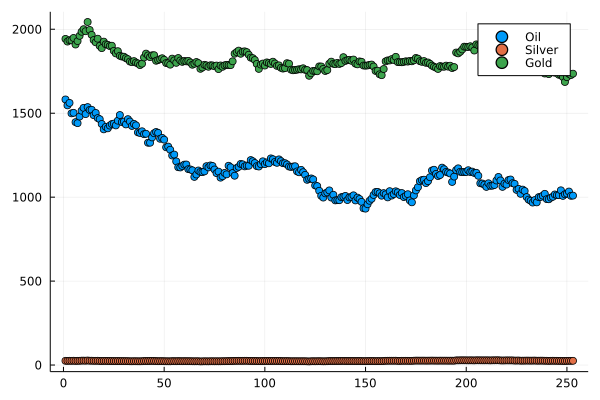

In [13]:
using Plots
Plots.scatter(DataO.Close, label = "Oil")
Plots.scatter!(DataS.Close, label = "Silver")
Plots.scatter!(DataG.Close, label = "Gold")

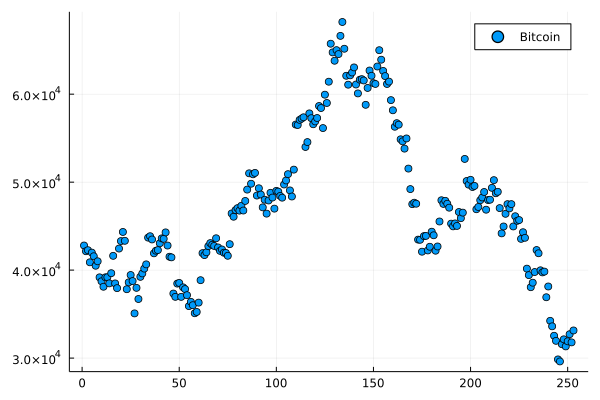

In [14]:
Plots.scatter(DataB.Close[1:253], label = "Bitcoin")

We are going to do a linear regression using least squares, now we see the different relationships between each commodity and the Bitcoin.

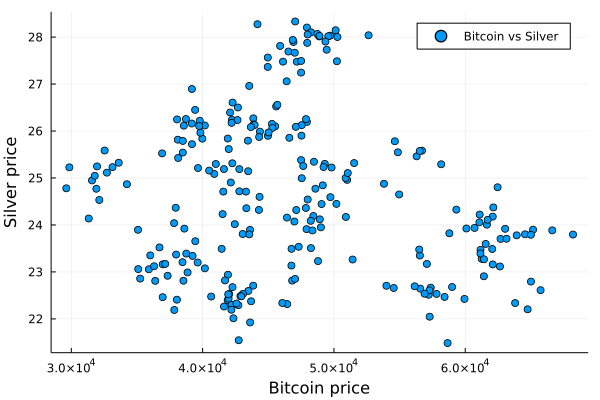

In [15]:
Plots.scatter(DataB.Close[1:253],DataS.Close ,label = "Bitcoin vs Silver", xlabel = "Bitcoin price",ylabel = "Silver price")



Using the packages to fit a Generalized Linear Model (GLM), and reading through
https://juliastats.org/GLM.jl/v0.11/#Installation-1

Here we are using GLM (Generalized Linear Models) Julia package which is based on the GLM package for R. predict() predicts the values of the dependent variable according to the fitted model (like Profit in our case) lm() is an alias function to fit a linear model for the given data.



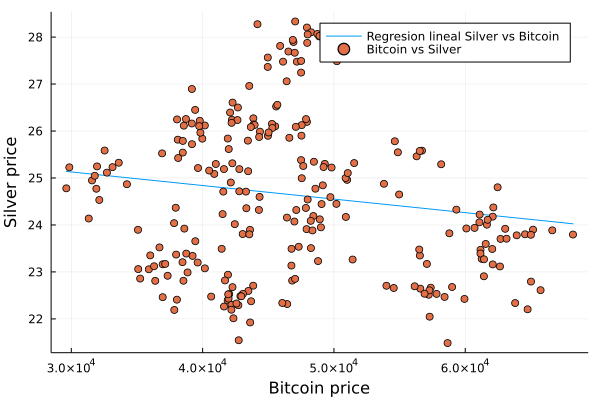

In [16]:
using GLM

dataBS = DataFrame(X=DataB.Close[1:253], Y=DataS.Close) # Splitting the features 
LinearR = lm(@formula(Y ~ X), dataBS) #Ordinary Least Squares Regression
linearFit = predict(LinearR)
plot(DataB.Close[1:253],linearFit, label = "Regresion lineal Silver vs Bitcoin")
Plots.scatter!(DataB.Close[1:253],DataS.Close ,label = "Bitcoin vs Silver", xlabel = "Bitcoin price",ylabel = "Silver price")

let's do the same with the rest of them

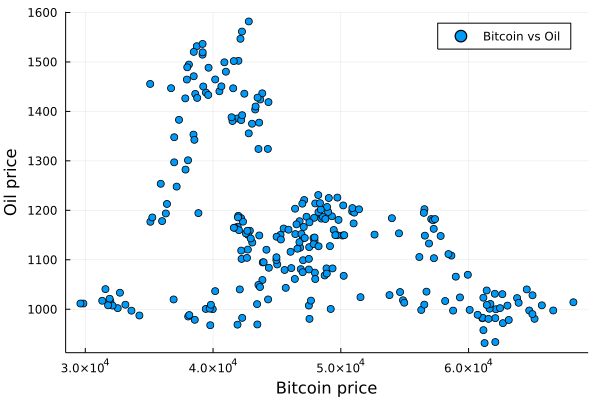

In [17]:
Plots.scatter(DataB.Close[1:253],DataO.Close ,label = "Bitcoin vs Oil",xlabel = "Bitcoin price",ylabel = "Oil price")

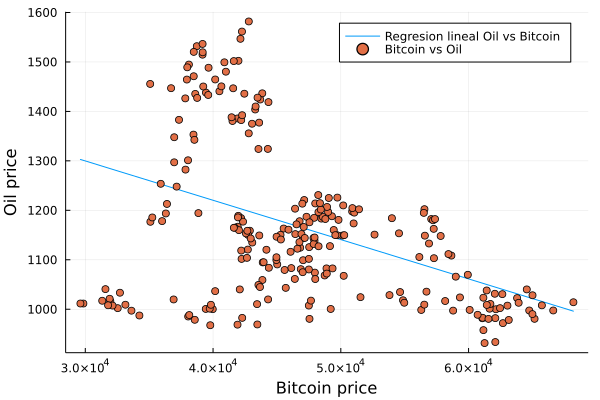

In [18]:
dataBO = DataFrame(X2=DataB.Close[1:253], Y2=DataO.Close)
LinearR2 = lm(@formula(Y2 ~ X2), dataBO) #Ordinary Least Squares Regression
linearFit2 = predict(LinearR2)
plot(DataB.Close[1:253],linearFit2, label = "Regresion lineal Oil vs Bitcoin")
Plots.scatter!(DataB.Close[1:253],DataO.Close ,label = "Bitcoin vs Oil",xlabel = "Bitcoin price",ylabel = "Oil price")

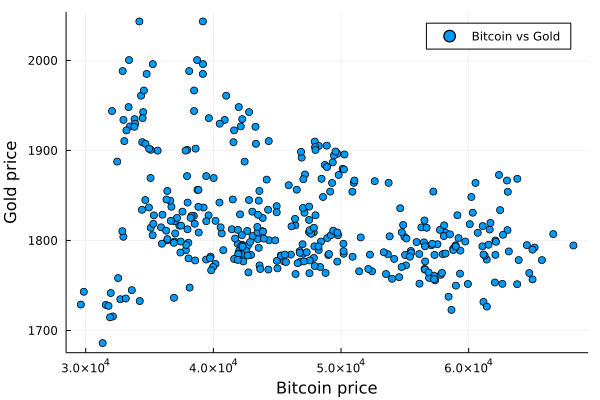

In [19]:
Plots.scatter(DataB.Close,DataG.Close ,label = "Bitcoin vs Gold", xlabel = "Bitcoin price",ylabel = "Gold price")

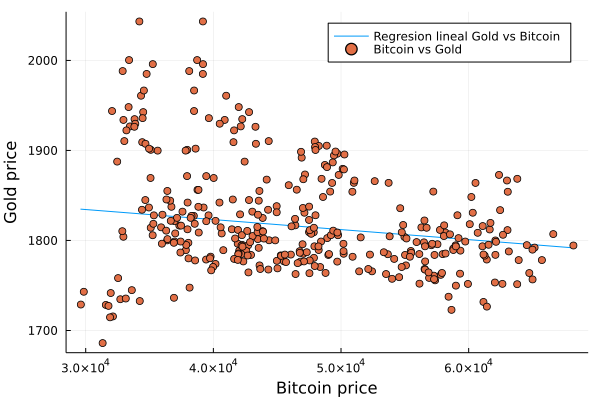

In [20]:
dataBG = DataFrame(X3=DataB.Close[1:253], Y3=DataG.Close)
LinearR3 = lm(@formula(Y3 ~ X3), dataBG) #Ordinary Least Squares Regression
linearFit3 = predict(LinearR3)
plot(DataB.Close[1:253],linearFit3, label = "Regresion lineal Gold vs Bitcoin")
Plots.scatter!(DataB.Close,DataG.Close ,label = "Bitcoin vs Gold", xlabel = "Bitcoin price",ylabel = "Gold price")

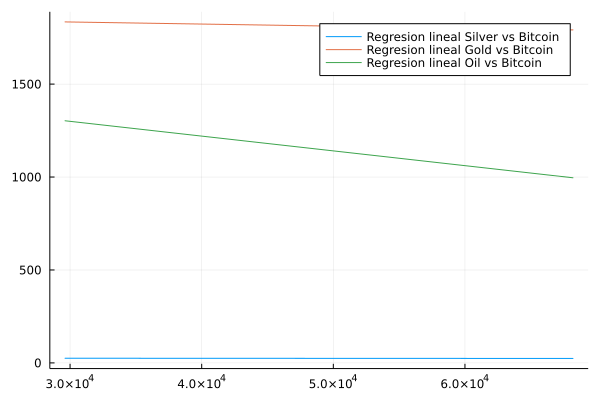

In [21]:
plot(DataB.Close[1:253],linearFit, label = "Regresion lineal Silver vs Bitcoin")
plot!(DataB.Close[1:253],linearFit3, label = "Regresion lineal Gold vs Bitcoin")
plot!(DataB.Close[1:253],linearFit2, label = "Regresion lineal Oil vs Bitcoin")

Autor: Paola Gallegos Pinto, 1005257935, Universidad Nacional, Bogota Colombia, 2022 